# CNN Facial Emotion Recognition

Libs: TensorFlow

In [ ]:
!pip install seaborn

In [101]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import os

import kagglehub

In [44]:
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fer2013


## Preprocess and Load Data

In [96]:
IMG_SIZE = 48
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    path + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    path + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## CNN

In [98]:
# Creating a seuquential model (linear stack of layers)
model = Sequential([
    # 1st Convolution layer - 128 filters 3x3 using ReLU
    # Input is 48x48 with 1 channel (grayscale)
    Conv2D(128, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    # Other possible activations: tanh, sigmoid, swish, etc.
    # padding='same' to preserve spatial dimensions

    # Downsample the feature map using max pooling (2x2 filter)
    MaxPooling2D(2,2),  # Can use AveragePooling2D or skip it entirely and use strides
    Dropout(0.4),  # Drop 40% of all neurons

    # 2nd Convolution layer - 256 filters for deeper learning
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    # 3rd Convolution layer - 512 filters for even deeper learning
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    # 4th Convolution layer - 512 filters again
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    # Can add more Conv + pooling layers for better performance

    Flatten(),  # Flatten 3D to 1D
    Dense(512, activation='relu'),  # Dense layer with 512 units and ReLU
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')  # Output layer with softmax
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()  # Summary printout

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [100]:
history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=128,
    epochs=100
)

Epoch 1/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4640 - loss: 1.4038 - val_accuracy: 0.5230 - val_loss: 1.2854
Epoch 2/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4732 - loss: 1.3896 - val_accuracy: 0.5272 - val_loss: 1.2584
Epoch 3/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4679 - loss: 1.3955 - val_accuracy: 0.5189 - val_loss: 1.2530
Epoch 4/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4638 - loss: 1.3902 - val_accuracy: 0.5314 - val_loss: 1.2604
Epoch 5/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.4781 - loss: 1.3780 - val_accuracy: 0.5161 - val_loss: 1.2662
Epoch 6/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.4845 - loss: 1.3578 - val_accuracy: 0.5321 - val_loss: 1.2305
Epoch 7/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.4732 - loss: 1.3641 - val_accuracy: 0.5328 - val_loss: 1.2528
Epoch 8/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.4848 - loss: 1

## Testing

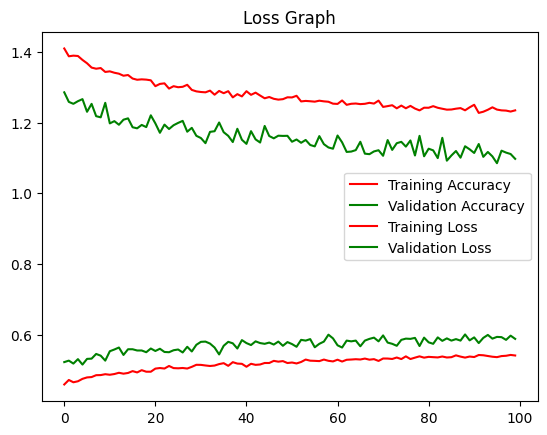

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
# plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
# plt.figure()

plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


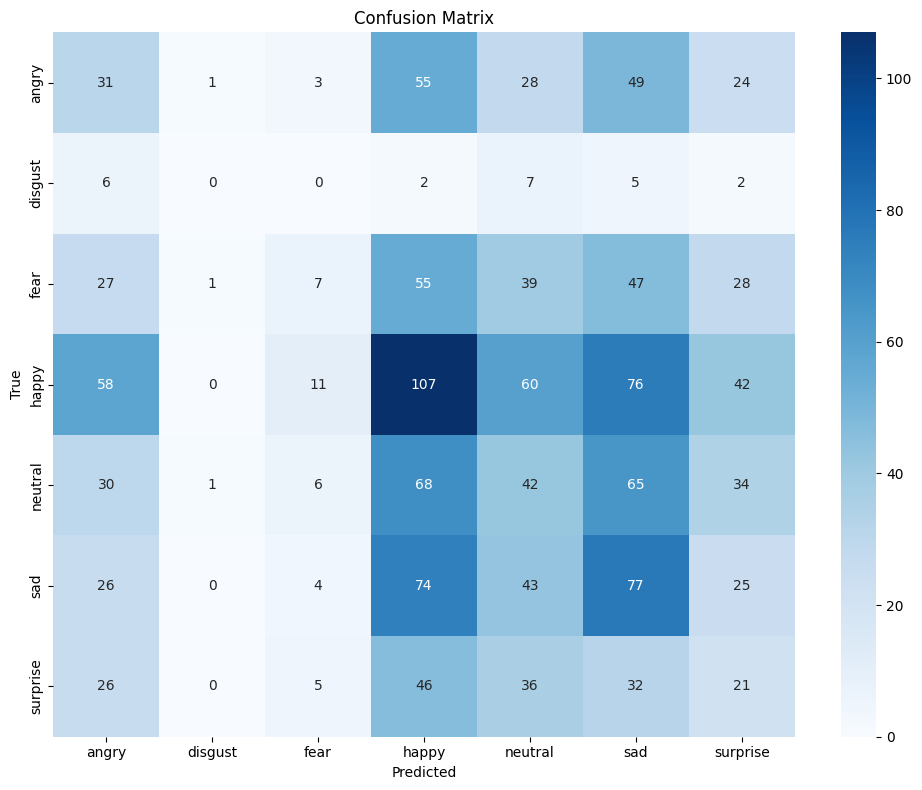

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val_labels = val_data.classes
label_names = list(val_data.class_indices.keys())

pred_probs = model.predict(val_data)
pred_labels = np.argmax(pred_probs, axis=1)

cm = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [106]:
report = classification_report(val_labels, pred_labels, target_names=label_names)
print(report)

              precision    recall  f1-score   support

       angry       0.15      0.16      0.16       191
     disgust       0.00      0.00      0.00        22
        fear       0.19      0.03      0.06       204
       happy       0.26      0.30      0.28       354
     neutral       0.16      0.17      0.17       246
         sad       0.22      0.31      0.26       249
    surprise       0.12      0.13      0.12       166

    accuracy                           0.20      1432
   macro avg       0.16      0.16      0.15      1432
weighted avg       0.19      0.20      0.19      1432



## Others

In [107]:
model.save('emotion_class_tf.keras')

In [108]:
!realpath emotion_class_tf.keras

/content/emotion_class_tf.keras
